# Supervised UMAP
While doing research online we found that there is a supervised implementation of UMAP in python. This file is an attempt to use this method for data visualisation and perharps as a method for feature engineering.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import umap
import pandas as pd
import os
import sklearn as sk
import plotly.express as px

In [2]:
core_path = './data'
train_df = pd.read_csv( os.path.join(core_path, 'train.csv.gz'))
test_df = pd.read_csv( os.path.join(core_path, 'test.csv.gz'))
indexes = pd.read_csv( os.path.join(core_path, 'indexes.csv'))


In [3]:
x_train = train_df[indexes["index"]]
x_test = test_df[indexes["index"]]
x_tot = pd.concat([x_train, x_test], axis = 0)

In [5]:
y = train_df.labels.copy()
y[y == "CBP"] = 2
y[y == "KAT5"] = 1
y[y == "eGFP"] = 0
y = np.array(y, dtype=int)
y_test = -1*np.ones(test_df.shape[0])
y_tot = np.concatenate((y, y_test))


In [43]:
map = umap.UMAP(n_components = 3, n_neighbors=100).fit(X = x_train, y = y)

In [44]:
embedding = map.transform(x_tot)

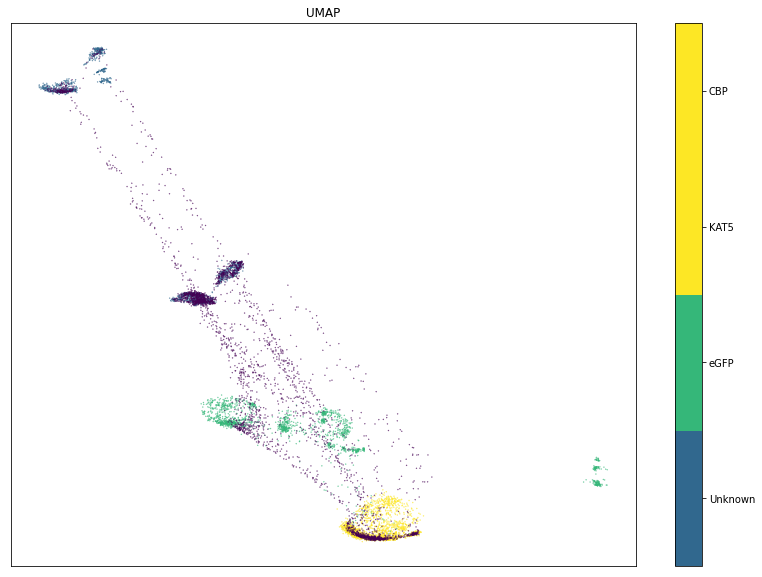

In [45]:
classes = ["Unknown", "eGFP", "KAT5", "CBP"]
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*embedding.T[:2,:], s=0.1, c=y_tot, alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(5)-0.5)
cbar.set_ticks(np.arange(4))
cbar.set_ticklabels(classes)
plt.title('UMAP');

In [47]:
fig = px.scatter_3d(x=embedding.T[0,:], y=embedding.T[1,:], z=embedding.T[2,:], color=y_tot)
fig.show()

### Trying with cross validation

In [49]:
x = x_train.iloc[:3000,:]
map = umap.UMAP(n_components = 3, n_neighbors=100).fit(X = x, y = y[:3000])

In [50]:
x_train.iloc[3000:,:]

,Xkr4,Gm1992,Gm19938,Gm37381,Rp1,Sox17,Gm37323,Mrpl15,Lypla1,Tcea1,...,CAAA01118383.1,AC132444.1,AC132444.6,Vamp7,Spry3,Tmlhe,4933409K07Rik,Gm10931,CAAA01147332.1,AC149090.1
3000,2.128461,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.803639,...,0.000000,0.0,0.0,0.0,0.0,0.803639,0.0,0.0,0.0,0.000000
3001,2.340600,0.0,1.208025,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.776308,0.0,0.0,0.0,0.0,1.508578,0.0,0.0,0.0,2.084504
3002,2.107817,0.0,0.442230,0.0,0.0,0.0,0.0,0.000000,0.000000,0.981524,...,0.442230,0.0,0.0,0.0,0.0,0.442230,0.0,0.0,0.0,0.442230
3003,1.849880,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,1.145376,...,1.145376,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.728423
3004,1.917238,0.0,0.000000,0.0,0.0,0.0,0.0,1.361252,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2.108581,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.312030
4996,3.108972,0.0,0.783343,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.466491,0.0,0.0,0.0,1.518711
4997,2.025946,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,1.456669,0.0,0.0,0.0,2.025946
4998,1.227544,0.0,0.791370,0.0,0.0,0.0,0.0,0.000000,0.000000,0.791370,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000


In [51]:
embedding = map.transform(x_train.iloc[3000:,:])

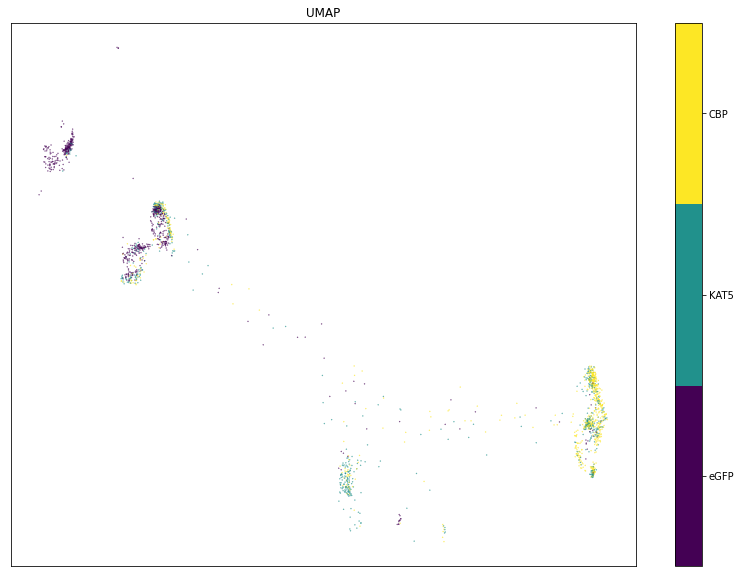

In [52]:
classes = ["eGFP", "KAT5", "CBP"]
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*embedding.T[:2,:], s=0.1, c=y[3000:], alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(4)-0.5)
cbar.set_ticks(np.arange(3))
cbar.set_ticklabels(classes)
plt.title('UMAP');

In [53]:
fig = px.scatter_3d(x=embedding.T[0,:], y=embedding.T[1,:], z=embedding.T[2,:], color=y[3000:])
fig.show()

In [14]:
map = umap.UMAP(n_components = 100, n_neighbors=100).fit(X = x_train, y = y)

In [15]:
train_umap = map.transform(X = x_train)
test_umap = map.transform(X = x_test)

In [17]:
train_umap_df = pd.DataFrame(train_umap)
test_umap_df = pd.DataFrame(test_umap)

In [19]:
test_umap_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.473536,13.663035,7.454830,3.309324,6.396730,11.388470,5.736592,6.462628,1.423723,0.764963,...,5.629151,7.158921,5.715326,4.387964,6.343731,2.333930,4.612392,2.385645,4.531539,4.602399
1,12.563656,3.664044,10.510320,0.150263,9.042876,5.388219,6.168298,8.100880,1.668023,1.130690,...,5.855690,8.430699,6.988033,5.507784,4.766170,-1.527109,8.317569,2.367946,4.762654,6.604072
2,11.868819,3.887311,10.662104,0.515638,8.960017,5.316959,6.024637,8.337481,1.570100,0.867623,...,5.981222,8.693405,6.989520,5.421627,4.797843,-1.392665,8.064088,2.529963,4.875511,6.591040
3,11.986945,3.731256,11.031333,0.530576,8.970263,5.008523,5.908350,8.459529,1.701706,0.611541,...,6.037100,8.965943,7.261947,5.502619,4.747773,-2.068444,8.219693,2.562720,5.080502,6.905126
4,12.378641,3.583945,10.919007,0.399397,9.026898,5.130766,5.968581,8.292612,1.663819,0.680457,...,5.909697,8.745147,7.187758,5.441623,4.769909,-2.004918,8.278143,2.494206,4.955706,6.819877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3088,0.345934,11.994810,6.720501,4.224318,4.958892,9.992144,6.240392,7.835321,1.640374,1.539790,...,4.724243,7.250863,5.654895,4.859684,5.444146,1.902683,4.952373,3.172888,4.906909,4.895460
3089,12.500455,3.705796,10.431483,0.170713,9.003431,5.474308,6.144628,8.073138,1.661543,1.135583,...,5.844077,8.401671,6.958800,5.488290,4.788229,-1.457015,8.277029,2.386789,4.755032,6.583070
3090,-0.015536,11.901247,6.749521,4.284999,4.903808,10.256700,6.195957,7.709433,1.713441,1.660379,...,4.832772,7.265203,5.701022,4.725280,5.330755,1.907946,4.957093,3.313925,4.877590,4.823578
3091,0.434918,12.203279,6.659153,4.190832,4.969872,10.013250,6.241658,7.852801,1.602854,1.476938,...,4.716077,7.253078,5.642223,4.878689,5.549136,1.905073,4.940768,3.101877,4.903170,4.919720


In [18]:
train_umap_df.to_csv(os.path.join(core_path, 'train_umap.csv'))
test_umap_df.to_csv(os.path.join(core_path, 'test_umap.csv'))

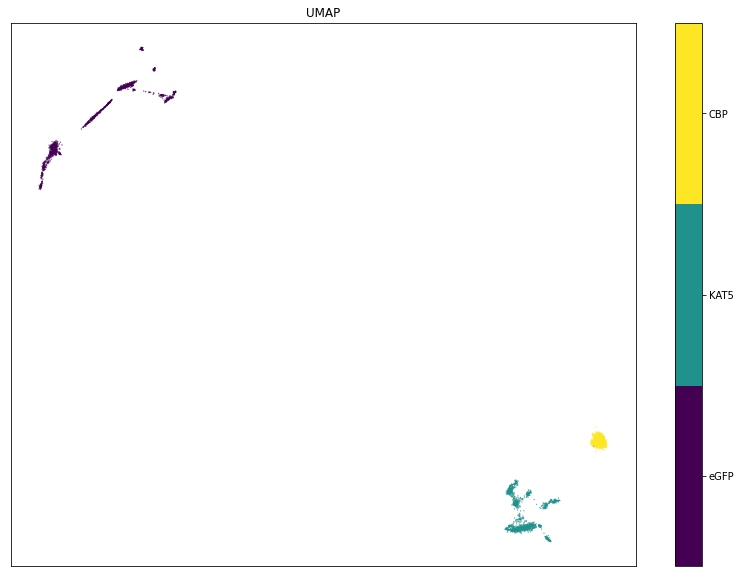

In [11]:
classes = ["eGFP", "KAT5", "CBP"]
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*embedding.T[:2,:], s=0.1, c=y, alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(4)-0.5)
cbar.set_ticks(np.arange(3))
cbar.set_ticklabels(classes)
plt.title('UMAP');

In [13]:
fig = px.scatter_3d(x=embedding.T[0,:], y=embedding.T[1,:], z=embedding.T[2,:], color=y)
fig.show()

In general this method creates nice plots but seems to rely to much on the labels. Thus it has a tendancy to overfit the data. We decided to set aside this method.